In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load the dataset
df = pd.read_csv("DS_Salaries.csv")
# Display first few rows of the dataset
print(df.head())

C:\Users\medar\AppData\Local\Temp\ipykernel_8960\3114815769.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


   Unnamed: 0  work_year experience_level employment_type  \
0           0       2020               MI              FT   
1           1       2020               SE              FT   
2           2       2020               SE              FT   
3           3       2020               MI              FT   
4           4       2020               SE              FT   

                    job_title  salary salary_currency  salary_in_usd  \
0              Data Scientist   70000             EUR          79833   
1  Machine Learning Scientist  260000             USD         260000   
2           Big Data Engineer   85000             GBP         109024   
3        Product Data Analyst   20000             USD          20000   
4   Machine Learning Engineer  150000             USD         150000   

  employee_residence  remote_ratio company_location company_size  
0                 DE             0               DE            L  
1                 JP             0               JP            S  

In [13]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


In [21]:
# Calculate and display major moments for numerical features
numeric_df = df.select_dtypes(include='number')  # Select only numeric columns
moments = numeric_df.describe().transpose()[['mean', '50%', 'std']]
skewness = numeric_df.skew()
kurtosis = numeric_df.kurtosis()

# Combine moments, skewness, and kurtosis into a single DataFrame
statistics_df = pd.concat([moments, skewness, kurtosis], axis=1)
statistics_df.columns = ['Mean', 'Median', 'Standard Deviation', 'Skewness', 'Kurtosis']

# Display the statistics
print("Descriptive Statistics")
print(statistics_df)

Descriptive Statistics
                        Mean    Median  Standard Deviation   Skewness  \
Unnamed: 0        262.500000     262.5        1.519874e+02   0.000000   
work_year        2021.313688    2021.0        6.999884e-01  -0.520215   
salary         352690.001901  110000.0        1.657239e+06  13.081892   
salary_in_usd  108337.385932   98079.0        7.283841e+04   1.853733   
remote_ratio       70.247148     100.0        4.028158e+01  -0.862524   

                 Kurtosis  
Unnamed: 0      -1.200000  
work_year       -0.857546  
salary         214.407999  
salary_in_usd    6.972955  
remote_ratio    -0.914866  


In [17]:
#Correlation Analysis
# Select only numeric columns
numeric_df = df.select_dtypes(include='number')
# Compute correlation matrix
correlation_matrix = numeric_df.corr()
# Display correlation table
print("Correlation Table:")
print(correlation_matrix)

Correlation Table:
               Unnamed: 0  work_year    salary  salary_in_usd  remote_ratio
Unnamed: 0       1.000000   0.905756 -0.084813       0.108148      0.091523
work_year        0.905756   1.000000 -0.076141       0.136151      0.071553
salary          -0.084813  -0.076141  1.000000      -0.084108     -0.014862
salary_in_usd    0.108148   0.136151 -0.084108       1.000000      0.118177
remote_ratio     0.091523   0.071553 -0.014862       0.118177      1.000000


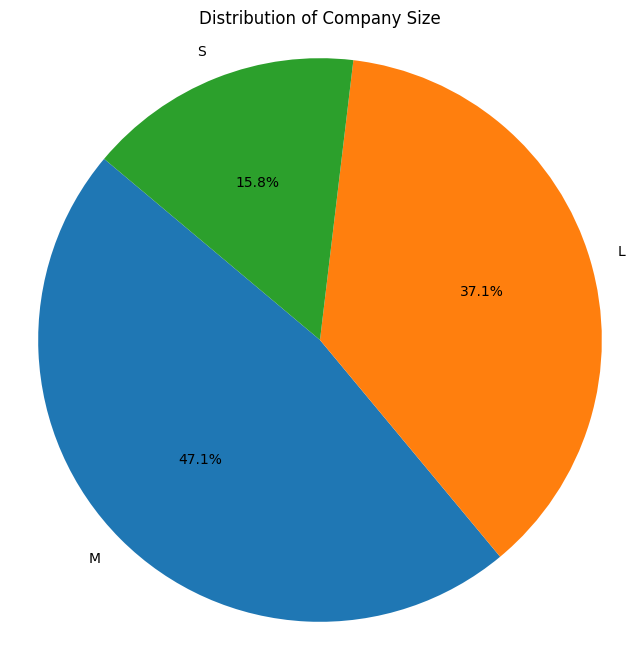

In [18]:
#Categorical Graph
# Plot a pie chart for a categorical variable
plt.figure(figsize=(8, 8))
labels = df['company_size'].value_counts().index
sizes = df['company_size'].value_counts().values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Company Size')
plt.axis('equal')
plt.show()

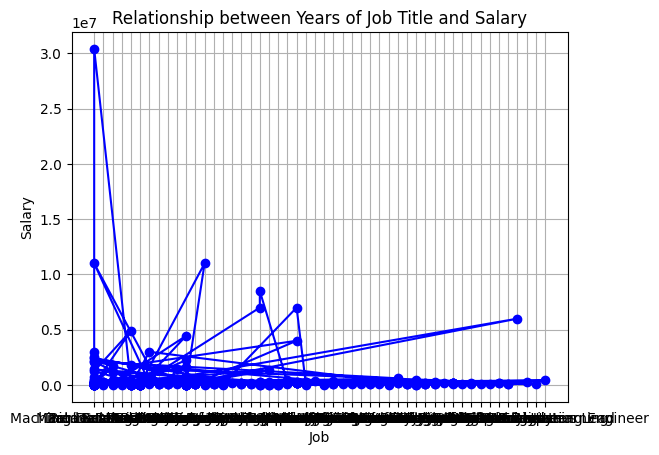

In [19]:
#Relational Graph
# Plot a line graph (e.g., Relationship between Years of Job Title and Salary)
plt.plot(df['job_title'], df['salary'], color='blue', marker='o')
plt.title('Relationship between Years of Job Title and Salary')
plt.xlabel('Job')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

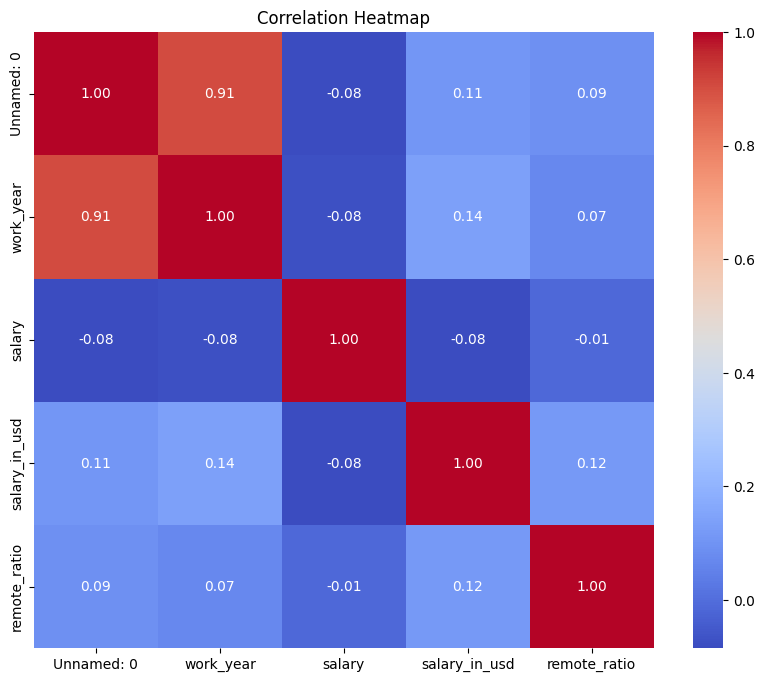

In [20]:
#Statistical graph
# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()